In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.datasets import load_files
from sklearn.utils import Bunch
from PIL import Image, UnidentifiedImageError
import pathlib

In [6]:
# Path to your dataset folder
dataset_path = pathlib.Path("../data/kagglecatsanddogs_3367a/PetImages/")

In [7]:
# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [8]:
# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 19968 images belonging to 2 classes.


In [9]:
# Load validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 4991 images belonging to 2 classes.


In [10]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')  # Output layer should have 1 unit for binary classification
])

/home/bittu/Desktop/MachineLearning/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1722595381.895372   17811 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722595382.124404   17811 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722595382.12

In [11]:
# Compile the model
model.compile(loss=BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5


/home/bittu/Desktop/MachineLearning/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1722595393.177862   17975 service.cc:146] XLA service 0x7dcc3000eab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722595393.177953   17975 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-08-02 16:13:13.237419: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-02 16:13:13.588594: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8

  3/624 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.4497 - loss: 0.7040  

I0000 00:00:1722595397.519993   17975 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


452/624 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.5303 - loss: 0.6891

/home/bittu/Desktop/MachineLearning/venv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.5452 - loss: 0.6834 - val_accuracy: 0.7143 - val_loss: 0.5671
Epoch 2/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7124 - loss: 0.5653 - val_accuracy: 0.7644 - val_loss: 0.4850
Epoch 3/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.7698 - loss: 0.4929 - val_accuracy: 0.7818 - val_loss: 0.4634
Epoch 4/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.7935 - loss: 0.4481 - val_accuracy: 0.8032 - val_loss: 0.4196
Epoch 5/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.8132 - loss: 0.4150 - val_accuracy: 0.8036 - val_loss: 0.4185


In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print("Test Accuracy:", test_acc)

156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8131 - loss: 0.4096
Test Accuracy: 0.8050490617752075


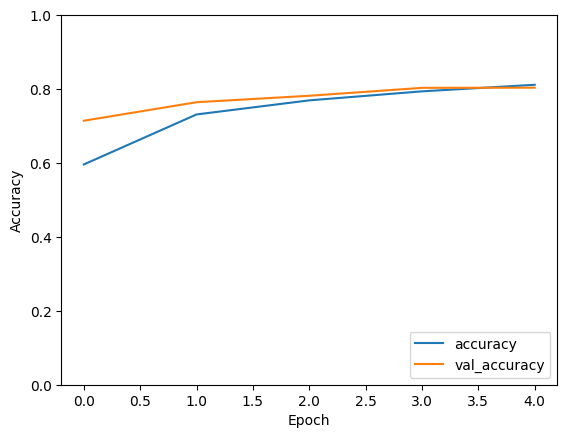

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


/tmp/ipykernel_17811/601482713.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {class_names[int(true_labels[i])]}\nPredicted: {class_names[int(predicted_labels[i])]}")


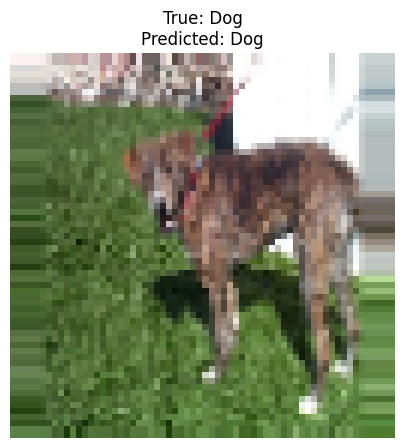

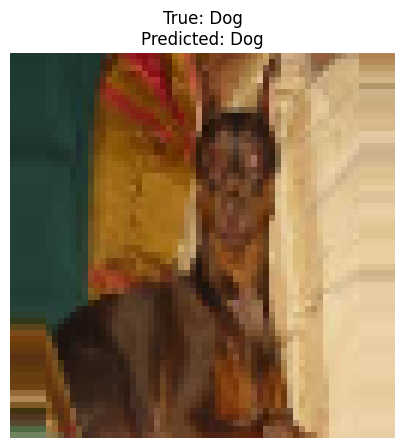

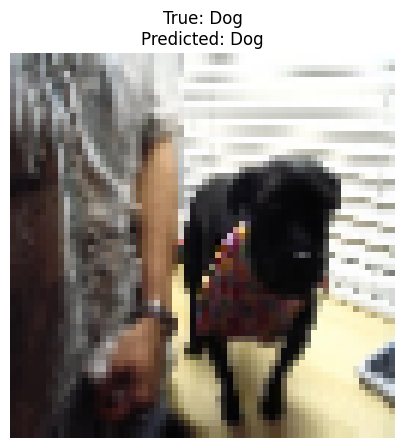

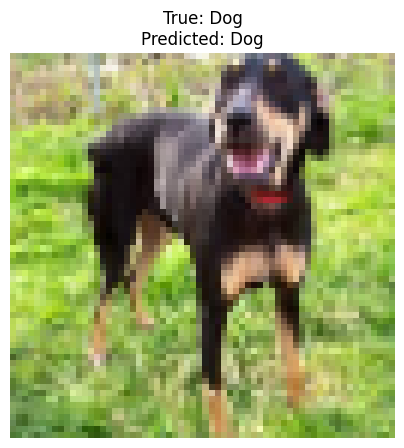

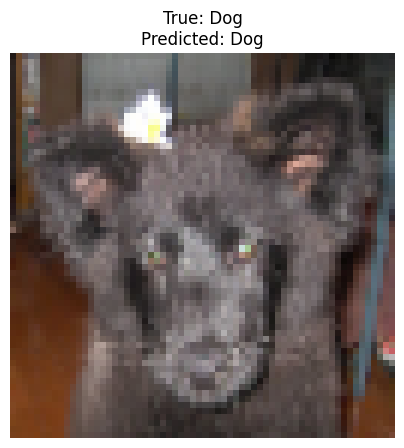

In [14]:
# Get a batch of images and labels from the validation generator
validation_batch = next(validation_generator)
images, true_labels = validation_batch

# Use the model to predict the classes of these images
predictions = model.predict(images)
predicted_labels = (predictions > 0.5).astype(int)

# Map label indices to class names
class_names = list(validation_generator.class_indices.keys())

# Display the results
for i in range(5):
    plt.figure(figsize=(5, 5))
    plt.imshow(images[i])
    plt.title(f"True: {class_names[int(true_labels[i])]}\nPredicted: {class_names[int(predicted_labels[i])]}")
    plt.axis('off')
    plt.show()